<a href="https://colab.research.google.com/github/Marcosandrade21/MVP---Analise-de-Dados-e-Boas-Praticas/blob/main/Notebook_MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Marcos_Gabriel_Fernandes_Andrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

Nome: Marcos Gabriel Fernandes Andrade

Matrícula: 4052024002023

Dataset:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download


# Descrição do Problema

O Acidente Vascular Cerebral (AVC) representa uma das principais causas de morte e incapacidade permanente no mundo. Segundo a Organização Mundial da Saúde (2021), mais de 12 milhões de pessoas sofrem AVCs anualmente, sendo que 70% dos casos poderiam ser evitados com o controle adequado de fatores de risco. No Brasil, o AVC é responsável por mais de 100 mil mortes por ano (DATASUS, 2022), além de gerar custos elevados para o sistema de saúde e perda de qualidade de vida para os sobreviventes, que frequentemente enfrentam sequelas motoras, cognitivas e emocionais.

O conjunto de dados Stroke Prediction Dataset reúne informações estruturadas de 5.108 pacientes, incluindo tanto casos confirmados de AVC quanto um grupo controle. O conjunto contém atributos como idade, hipertensão, doença cardíaca, níveis de glicose, tabagismo e IMC. O objetivo é analisar as correlações entre esses fatores de risco e a ocorrência de AVC, identificando padrões clínicos e demográficos associados ao desfecho.


# Hipóteses do Problema

As hipóteses que tracei são as seguintes:

•	Qual a idade média dos pacientes que sofreram AVC?

•	Pessoas com hipertensão e doenças cardíacas possuem mais chances de ter AVC?

•	Existem relações entres níveis altos de glicose no sangue e AVC?

•	O tabagismo aumenta a probabilidade de AVC?

•	Entre os fatores de risco presentes no dataset (hipertensão, doença cardíaca, alto nível de glicose , tabagismo e obesidade), qual está mais fortemente associado à ocorrência de AVC?


# Tipo de Problema

Este é um problema de classificação supervisionada do tipo binário. Com base nos atributos clínicos e de estilo de vida presentes no dataset, o objetivo é identificar, por meio de análise de importância de variáveis, quais fatores de risco (como hipertensão, glicose elevada ou tabagismo) possuem maior associação estatística com os casos de AVC.


# Seleção de Dados

O Dataset Stroke Prediction é um conjunto de dados público disponível no repositório Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download), contendo registros clínicos de 5.110 pacientes com e sem histórico de AVC. Optei por este dataset por alinhar-se a minha experiência profissional e formação acadêmica na área da saúde.

O dataset Stroke Prediction é amplamente utilizado em pesquisas de predição de risco cardiovascular e certamente será um bom dataset para execução deste MVP. Para esta análise, utilizei a versão original do dataset.



# Atributos do Dataset

O dataset que será analisado neste MVP possui 5.110 linhas e 12 atributos:

•	Id (identificador único)

•	Gender (gênero: "Masculino", "Feminino" ou "Outro")

•	Age (idade do paciente)

•	Hypertension (hipertensão: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão)

•	Heart_disease (doença cardíaca: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca)

•	Ever_married (sempre casado: "Não" ou "Sim")

•	Work_type (tipo de trabalho: "crianças", "emprego público", "nunca trabalhou", "privado" ou "autônomo")

•	Residence_type (tipo de residência: "rural" ou "urbano")

•	Avg_glucose_level (nível médio de glicose no sangue)

•	BMI (índice de massa corporal)

•	Smoking_status (status de tabagismo: "fumou anteriormente", "nunca fumou", "fuma" ou "desconhecido")

•	Stroke (derrame: 1 se o paciente teve um derrame ou 0 se não teve)

*Observação: “Desconhecido” em smoking_status significa que a informação não está disponível para este paciente


# Importação das Bibliotecas Necessárias e Carga de Dados

O carregamento do dataset será realizado por meio de um repositório público do GitHub, utilizando a biblioteca pandas. Para isso, a biblioteca foi importada no código abaixo, juntamente com as demais bibliotecas necessárias para a análise, tratamento, visualização e pré-processamento dos dados.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import logit

In [121]:
#carregar o dataset por meio do GitHub
url = "https://raw.githubusercontent.com/Marcosandrade21/MVP---Analise-de-Dados-e-Boas-Praticas/refs/heads/main/healthcare-dataset-stroke.csv"

In [58]:
df = pd.read_csv(url)

In [59]:
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Verificamos que o Dataset foi importado com êxito e prosseguiremos com a análise exporatória dos dados.

# Análise de Dados

# Atributos, instâncias e tipos de dados


In [122]:
#mostrar os atributos com tipos de dados
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.\n")

print("Tipos de dados:")
print(df.dtypes)

O dataset tem 5106 linhas e 11 colunas.

Tipos de dados:
gender                      object
age                          int64
hypertension                 int64
heart_disease                int64
avg_glucose_level          float64
bmi                        float64
stroke                       int64
smoking_Unknown              int64
smoking_formerly_smoked      int64
smoking_never_smoked         int64
smoking_smokes               int64
dtype: object


O Dataset Stroke Prediction possui 5.110 registros (linhas) e 12 atributos (colunas), contendo atributos com classes númericas e categóricas (textuais). A divisão dos atributos é observada da seguinte forma:

Variáveis numéricas: 07

Inteiras (int64): Id, hypertension, heart_disease, stroke (binárias)

Decimais (float64): Age, avg_glucose_level, bmi

Variáveis categóricas: 05

Textuais (object): Gender, ever_married, work_type, residence_type, smoking_status



Para responder às hipóteses desta análise, alguns atributos não serão utilizados como: Ever_married, work_type e residence_type, visto que o intuito é verificar a correlação entre fatores epidemiológicos e AVC. Essas colunas serão removidas na etapa de transformação, seguindo as boas práticas de análise de dados.

#Valores faltantes

In [61]:
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


O resultado mostra que o atributo bmi (IMC) possui 201 valores nulos. Para o cálculo do IMC, são necessárias duas variáveis (peso e altura). Os registros faltantes pressupõem que, durante a coleta de dados, não foi possível obter algumas dessas variáveis.

Na etapa de tratamento, substituiremos os valores faltantes pela mediana do atributo. Como o IMC pode variar significativamente em casos de obesidade grave ou desnutrição, a mediana garante que esses valores extremos não distorçam a estimativa central.

#Estatísticas Descritivas

Esta seção apresenta as estatísticas descritivas dos atributos, incluindo contagem, média, desvio padrão, valores mínimos e máximos, proporcionando uma visão ampla da distribuição dos dados. Essa análise é fundamental para identificar anomalias e necessidades de transformações.

Ao examinar as estatísticas, observamos a presença de valores atípicos nos atributos avg_glucose_level e bmi (valores extremamente baixos em comparação com a média) evidenciando a necessidade de análise individualizada desses atributos.

O atributo age (idade), outra variável numérica, apresenta valores dentro do padrão esperado (0 a 82 anos). Para simplificar a análise, excluíremos as casas decimais, convertendo os valores para números inteiros.



In [129]:
#apresentar as estatísticas
display(df.describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_Unknown,smoking_formerly_smoked,smoking_never_smoked,smoking_smokes
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,43.212103,0.097532,0.054054,106.142689,28.874638,0.048766,0.301998,0.173325,0.370153,0.154524
std,22.612181,0.296710,0.226146,45.261933,7.689297,0.215400,0.459169,0.378566,0.482893,0.361486
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.890000,28.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000


#Desvio Padrão

Exibição do desvio padrão das variáveis númericas.

In [63]:
print(df.std(numeric_only=True))

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64


Observando as métricas de dispersão, o atributo id apresenta um desvio padrão extremamente elevado (21.161,72). Como se trata de atributo identificador de pacientes, que não é o objetivo desta análise, e por contribuir com ruídos nos modelos estatísticos, realizaremos a exclusão desta coluna nas transformações.

O desvio padrão das variáveis avg_glucose_level e bmi serão explorados na próxima seção. o desvio padrão do atributo age indica que a amostra possui grupos de diversas idades (crianças, adultos e idosos).

As variáveis binárias (hypertension, heart_disease e stroke) apresentam desvios padrão baixos (entre 0,21 e 0,30), o que é esperado para variáveis categóricas codificadas como 0 ou 1.

Para uma melhor visualização, o desvio padrão foi apresentado abaixo no gráfico de barras, já desconsiderando o atributo ID.

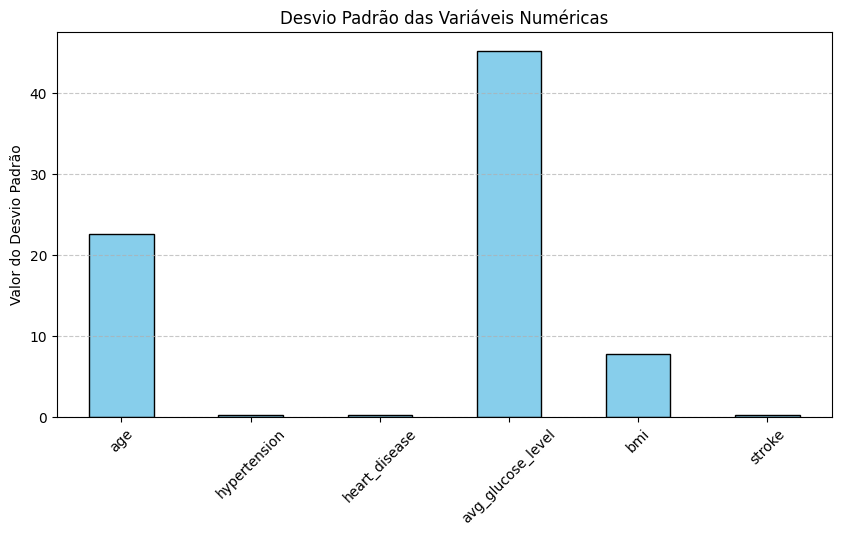

In [64]:
desvios = df.select_dtypes(include=['number']).std().drop('id', errors='ignore')

desvios.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.ylabel('Valor do Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Análise das variáveis avg_glucose_level (nível médio de glicose) e BMI (IMC)

#Nível médio de glicose

Segundo a Organização Mundial da Saúde (OMS), os níveis médios de glicose no sangue (em jejum) são classificados da seguinte forma:


*   Normal: 70-99 mg/dL (3,9-5,6 mmol/L)
*   Pré-diabetes: 100-125 mg/dL (5,6-6,9 mmol/L)
*   Diabetes: 126 mg/dL (7,0 mmol/L) ou superio

Nas análises anteriores, identificamos valores inferiores a 70 mg/dL, o que poderia indicar casos de hipoglicemia, ou, quando muito próximos a zero, valores inseridos de forma equivocada. Para confirmar essa análise, utilizamos um gráfico de barras para verificar a distribuição e um boxplot para identificar os outliers.

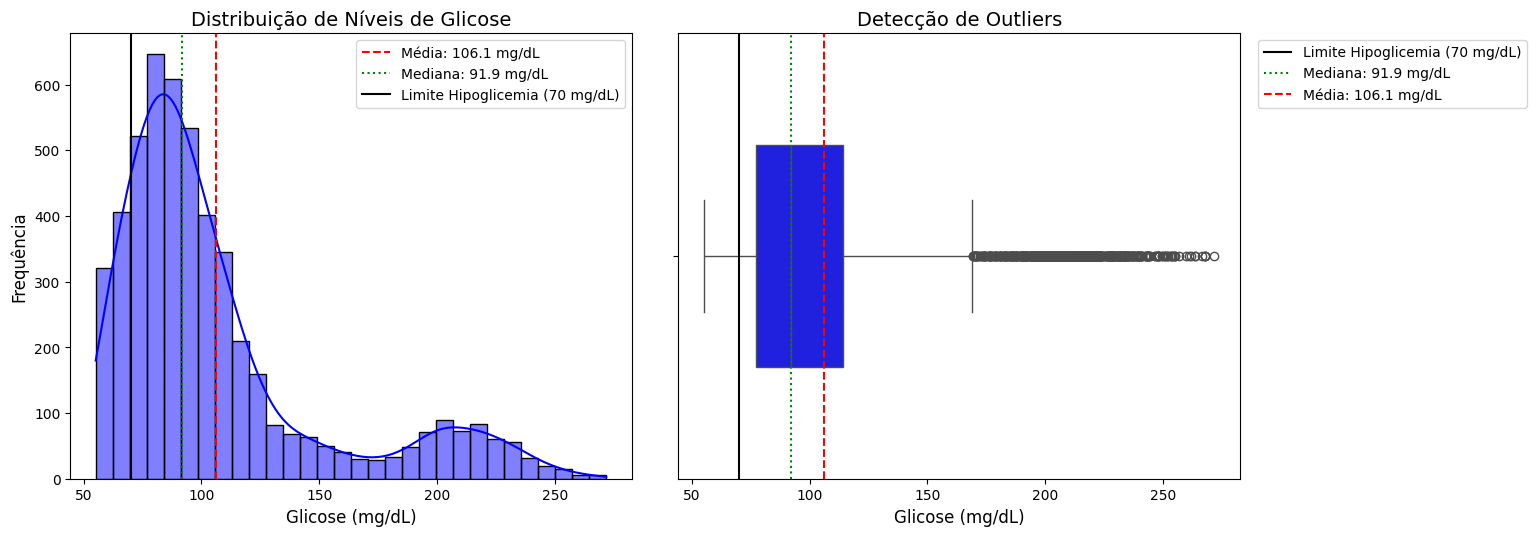

In [116]:
#plotar gráfico de barras
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['avg_glucose_level'], kde=True, bins=30, color='blue', edgecolor='black')


plt.axvline(df['avg_glucose_level'].mean(), color='red', linestyle='--',
            label=f'Média: {df["avg_glucose_level"].mean():.1f} mg/dL')
plt.axvline(df['avg_glucose_level'].median(), color='green', linestyle=':',
            label=f'Mediana: {df["avg_glucose_level"].median():.1f} mg/dL')
plt.axvline(70, color='black', linewidth=1.5, linestyle='-',
            label='Limite Hipoglicemia (70 mg/dL)')


plt.title('Distribuição de Níveis de Glicose', fontsize=14)
plt.xlabel('Glicose (mg/dL)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()

#plotar gráfico bloxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['avg_glucose_level'], color='blue', width=0.5)


plt.axvline(70, color='black', linewidth=1.5, linestyle='-',
            label='Limite Hipoglicemia (70 mg/dL)')
plt.axvline(df['avg_glucose_level'].median(), color='green', linestyle=':',
            label=f'Mediana: {df["avg_glucose_level"].median():.1f} mg/dL')
plt.axvline(df['avg_glucose_level'].mean(), color='red', linestyle='--',
            label=f'Média: {df["avg_glucose_level"].mean():.1f} mg/dL')

plt.title('Detecção de Outliers', fontsize=14)
plt.xlabel('Glicose (mg/dL)', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')


plt.tight_layout(pad=3.0)
plt.show()

Os gráficos demonstram a presença de valores fora dos padrões, como por exemplo 55 mg/dL (hipoglicemia grave) e 255 mg/dL (hiperglicemia crítica). Entretanto, conforme a literatura médica, estes resultados podem ocorrer em exames de pacientes em condições específicas.

Como não há evidências de que sejam erros de registro, optou-se por manter os dados originais, preservando a integridade do conjunto de dados para análises futuras.

#IMC


Os valores de IMC são categorizados da seguinte forma, conforme a OMS:

Baixo peso: < 18,5 kg/m²

Normal: 18,5–24,9 kg/m²

Sobrepeso: 25–29,9 kg/m²

Obesidade Grau I: 30–34,9 kg/m²

Obesidade Grau II: 35–39,9 kg/m²

Obesidade Grau III (mórbida): ≥ 40 kg/m²

Foi possível no decorrer das análises verificar que o dataset possui valores abaixo e acima dos intervalos. Para uma visão mais detalhada, verificaremos a distribuição destes resultados no intervalo de 0 a 100 em faixas de 05 a 05 verificando também a incidência de outliers.

In [66]:
#distribuir o atributo de 0 a 100 com intervalos de 5 casas
faixas = list(range(0, 101, 5))

distribuicao = pd.cut(df['bmi'], bins=faixas, right=False).value_counts().sort_index()

distribuicao_pct = (distribuicao / len(df) * 100)

tabela_distribuicao = pd.DataFrame({
    'Pacientes': distribuicao,
    '%': distribuicao_pct.round(1)
})


print("Distribuição de IMC em faixas de 05:")
print(tabela_distribuicao)

print(f"\nValores nulos: {df['bmi'].isnull().sum()}")

Distribuição de IMC em faixas de 05:
           Pacientes     %
bmi                       
[0, 5)             0   0.0
[5, 10)            0   0.0
[10, 15)          42   0.8
[15, 20)         478   9.4
[20, 25)        1060  20.7
[25, 30)        1409  27.6
[30, 35)        1000  19.6
[35, 40)         506   9.9
[40, 45)         254   5.0
[45, 50)          81   1.6
[50, 55)          44   0.9
[55, 60)          22   0.4
[60, 65)           8   0.2
[65, 70)           1   0.0
[70, 75)           1   0.0
[75, 80)           1   0.0
[80, 85)           0   0.0
[85, 90)           0   0.0
[90, 95)           1   0.0
[95, 100)          1   0.0

Valores nulos: 201


Dos 42 casos identificados com IMC abaixo de 15 kg/m² (0,8% do total), realizamos a verificação para confirmar se os resultados são correspondentes a pacientes crianças, onde seria possível encontrar esses valores.

In [67]:
low_bmi = df[df['bmi'] < 15].copy()

print("Estatísticas de idade para IMC < 15:")
print(low_bmi['age'].describe().to_string())

#filtrar casos adultos
low_bmi_adults = df[(df['bmi'] < 15) & (df['age'] > 18)].shape[0]
print(f"\n(IMC <15 e idade >18): {low_bmi_adults}")

Estatísticas de idade para IMC < 15:
count    42.00000
mean     10.19619
std      17.88188
min       0.08000
25%       1.82000
50%       4.50000
75%       9.00000
max      79.00000

(IMC <15 e idade >18): 4


Os resultados demonstram que, embora a maioria dos casos com IMC abaixo de 15 kg/m² esteja relacionada à faixa etária infantil, existem 04 valores correspondentes a pacientes adultos. Na etapa de transformação dos dados, excluiremos os registros com IMC inferior a 15 kg/m² e idade superior a 18 anos.

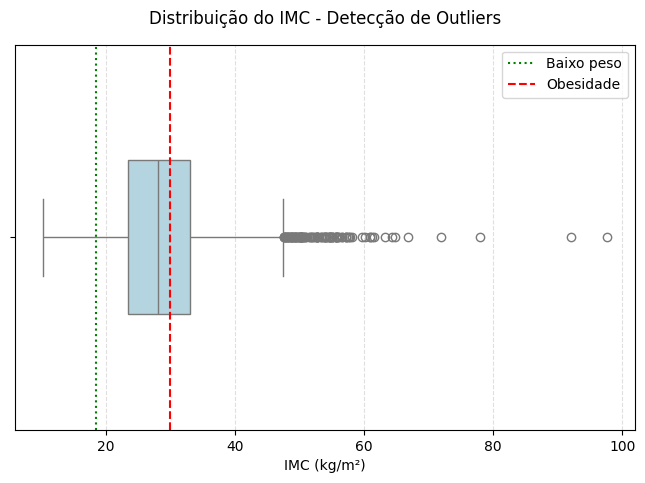

In [68]:
#plotar gráfico de boxplot
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['bmi'], color='lightblue', width=0.4)

plt.axvline(x=18.5, color='green', linestyle=':', label='Baixo peso')
plt.axvline(x=30, color='red', linestyle='--', label='Obesidade')

plt.title('Distribuição do IMC - Detecção de Outliers', pad=15)
plt.xlabel('IMC (kg/m²)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

Apesar de o gráfico apresentar uma quantidade significativa de outliers, esses valores podem ocorrer em situações clínicas específicas, como em casos de obesidade mórbida. Portanto, optou-se por manter esses registros na análise.

#Matriz de correlação

Realizado a matriz para verificar a correlação entre as variáveis numéricas Idade, Nível médio de glicose e IMC.

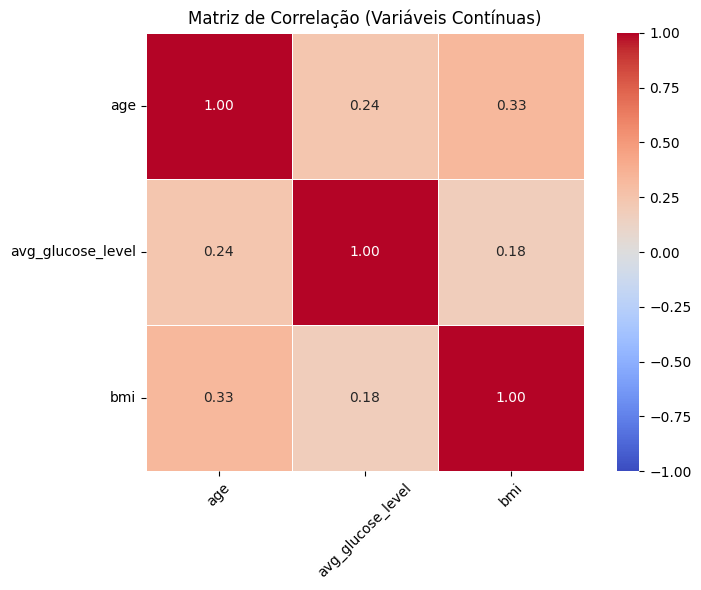

In [69]:
#selecionando as variáveis para apresentação na matriz
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[continuous_vars].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    linewidths=0.5,
    square=True
)

plt.title('Matriz de Correlação (Variáveis Contínuas)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

A matriz de correlação revela relações clinicamente relevantes:

A glicose mostra correlação moderada com o IMC (0.38), sugerindo associação entre obesidade e risco metabólico, enquanto a idade apresenta correlação positiva fraca com a glicose (0,25), compatível com o aumento da resistência insulínica ao envelhecer. O IMC não se correlaciona significativamente com a idade.

#Verificação da distribuição das variáveis categóricas

Nesta seção, foi  explorada a distribuição das variáveis categóricas com o intuito de apresentar as proporções do dataset e identificar necessidades de balanceamento e demais transformações.


In [70]:
#seleção das variáveis categóricas
cat_vars = ['gender', 'hypertension', 'heart_disease', 'smoking_status', 'stroke']

for var in cat_vars:
    counts = df[var].value_counts(dropna=False)
    total = counts.sum()
    pct = (counts / total * 100).round(1)

    print(f"\n{var.capitalize()}:")
    for value, count in counts.items():
        print(f"{str(value).capitalize()}: {count} {pct[value]}%")

    null_count = df[var].isnull().sum()
    if null_count > 0:
        print(f"Valores nulos: {null_count} ({(null_count/total*100).round(1)}%)")


Gender:
Female: 2994 58.6%
Male: 2115 41.4%
Other: 1 0.0%

Hypertension:
0: 4612 90.3%
1: 498 9.7%

Heart_disease:
0: 4834 94.6%
1: 276 5.4%

Smoking_status:
Never smoked: 1892 37.0%
Unknown: 1544 30.2%
Formerly smoked: 885 17.3%
Smokes: 789 15.4%

Stroke:
0: 4861 95.1%
1: 249 4.9%


Na análise das variáveis categóricas, obtivemos os seguintes resultados de distribuição:

Gênero: Distribuição equilibrada (58% masculino e 42% feminino).

Hipertensão e Doença Cardíaca: Baixa prevalência ( menos de 10% dos casos), conforme esperado em população geral.

Tabagismo: Resultado desconhecido para 30% dos registros.  Possivelmente devido a subnotificação (o fumo é um mau hábito e pode não ter sido relatado pelo paciente). Para preservar o tamanho real do dataset, foi optado por manter a categoria 'desconhecido' na amostra.

AVC: Os resultados revelam uma distribuição desbalanceada (5% de casos positivos na amostra). Essa disparidade evidencia a necessidade da aplicação de técnicas de balanceamento de classes. O balanceamento será realizado na etapa de pré-processamento.

#Tratamento dos valores nulos

Conforme identificado na análise exploratória, o atributo BMI (IMC) apresenta 201 registros ausentes. Como estratégia de tratamento, optou-se pela preenchimento dos campos com a mediana, evitando a perda amostral e minimizando viés.


In [71]:
#calcular a mediana da coluna 'bmi' para usar no preenchimento de valores faltantes
bmi_median = df['bmi'].median()

null_count_before = df['bmi'].isnull().sum()

#preencher os valores nulos com a mediana calculada
df['bmi'] = df['bmi'].fillna(bmi_median)

null_count_after = df['bmi'].isnull().sum()

print(f"""
ETAPA DE TRANSFORMAÇÃO (BMI):
---------------------------------
Mediana calculada: {bmi_median:.2f} kg/m²
Valores nulos antes: {null_count_before}
Valores nulos após: {null_count_after}
Substituídos: {null_count_before - null_count_after} registros
""")

print("\nEstatísticas atualizadas:")
print(df['bmi'].describe())


ETAPA DE TRANSFORMAÇÃO (BMI):
---------------------------------
Mediana calculada: 28.10 kg/m²
Valores nulos antes: 201
Valores nulos após: 0
Substituídos: 201 registros


Estatísticas atualizadas:
count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


#Exclusão dos valores da variável BMI (IMC)

A avaliação da variável bmi identificou 4 registros com valores inferiores a 15 kg/m² em pacientes adultos (idade > 18 anos). Considerando as evidências médicas, esses registros possuem fortes indícios de erro, sendo optado pela exclusão dos 04 registros do Dataset.

In [72]:
#filtra o DataFrame, removendo registros com IMC abaixo de 15 em adultos
df = df[~((df['bmi'] < 15) & (df['age'] > 18))]

low_bmi_adults = df[(df['bmi'] < 15) & (df['age'] > 18)].shape[0]
print(f"\nCasos com IMC <15 e idade >18: {low_bmi_adults}")


Casos com IMC <15 e idade >18: 0


#Transformação da variável Age (idade) em número inteiro

Confome verificado no ínicio da análise, a variável idade apresenta os valores com casas decimais. Para melhor visualização da variável, realizaremos a transformação para número inteiro. Nesta etapa, foi utilizado o critério de arredondamento de idade.

In [73]:
#arredonda os valores de idade para números inteiros completos
df['age'] = df['age'].round().astype(int)

#mostrar média antes e depois
original_mean = df['age'].mean()
rounded_mean = df['age'].round().mean()

print(f"""
Média original: {original_mean:.2f} anos
Média após arredondamento: {rounded_mean:.2f} anos
Diferença: {(rounded_mean - original_mean):.2f} anos
""")

print(df['age'].describe())


Média original: 43.21 anos
Média após arredondamento: 43.21 anos
Diferença: 0.00 anos

count    5106.000000
mean       43.212103
std        22.612181
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


/tmp/ipython-input-73-3817922215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].round().astype(int)


#Transformação da variável fumante em categórica

Utilizando a técnica One-Hot Encoding, a variável categórica smoking_status (status de tabagismo) será transformada em colunas binárias independentes, onde 1 indica a presença da categoria e 0 indica a ausência. Esta prática tem como objetivo permitir que modelos de machine learning processem a informação categórica além de contribuir com a preservação do significado clínico sem criar hierarquias artificiais.


In [74]:
print("Valores únicos em 'smoking_status':", df['smoking_status'].unique())

Valores únicos em 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [75]:
#Converte a coluna categórica 'smoking_status' em variáveis binárias
df = pd.get_dummies(
    df,
    columns=['smoking_status'],
    prefix='smoking',
    drop_first=False,  # Mantém todas as categorias
    dtype=int          # Garante que as colunas sejam 0 ou 1
)


print("Colunas criadas:", [col for col in df.columns if 'smoking_' in col])

#substituindo espaço por underline no nome das colunas
df = df.rename(columns={
    'smoking_formerly smoked': 'smoking_formerly_smoked',
    'smoking_never smoked': 'smoking_never_smoked'
})


print("\nPrimeiras linhas após a transformação:")
print(df[['smoking_Unknown', 'smoking_formerly_smoked', 'smoking_never_smoked', 'smoking_smokes']].head())

Colunas criadas: ['smoking_Unknown', 'smoking_formerly smoked', 'smoking_never smoked', 'smoking_smokes']

Primeiras linhas após a transformação:
   smoking_Unknown  smoking_formerly_smoked  smoking_never_smoked  \
0                0                        1                     0   
1                0                        0                     1   
2                0                        0                     1   
3                0                        0                     0   
4                0                        0                     1   

   smoking_smokes  
0               0  
1               0  
2               0  
3               1  
4               0  


#Exclusão das colunas ID, ever_married, work_type e residence_type  

Optou-se pela exclusão desses atributos, uma vez que não serão utilizados nesta análise e processamento. Por segurança, será criado uma cópia do Dataframe antes da exclusão, caso necessário a exploração destes dados.

In [76]:
#salvando o backup
df_backup = df.copy(deep=True)

In [77]:
colunas_para_remover = ['id', 'ever_married', 'work_type', 'Residence_type']

#excluindo as colunas do Dataset
df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

print("Colunas removidas:", colunas_para_remover)
print("\nColunas restantes:")
print(df.columns.tolist())

Colunas removidas: ['id', 'ever_married', 'work_type', 'Residence_type']

Colunas restantes:
['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'smoking_Unknown', 'smoking_formerly_smoked', 'smoking_never_smoked', 'smoking_smokes']


#Resolução das Hipóteses

Com a exploração do Dataset e sua transformação, as hipóteses dos problemas podem ser verificadas.

Qual a idade média dos pacientes que sofreram AVC?

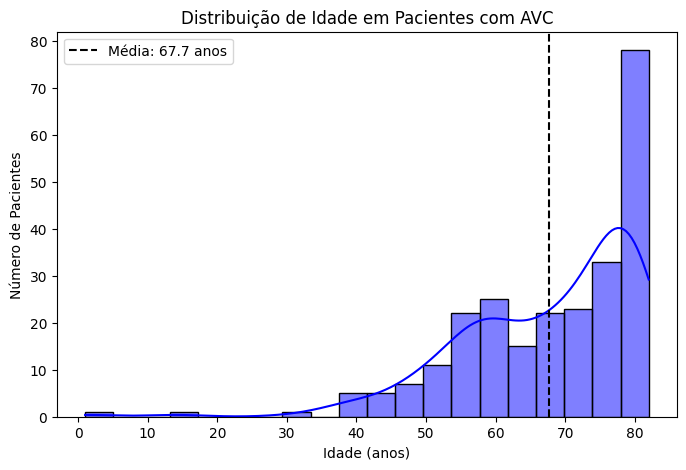

In [117]:
#definindo os pacientes com avc
pacientes_avc = df[df['stroke'] == 1]

idade_media_avc = pacientes_avc['age'].mean()

estatisticas = pacientes_avc['age'].describe()

# Visualização
plt.figure(figsize=(8, 5))
sns.histplot(pacientes_avc['age'], bins=20, kde=True, color='blue')
plt.axvline(idade_media_avc, color='black', linestyle='--', label=f'Média: {idade_media_avc:.1f} anos')
plt.title('Distribuição de Idade em Pacientes com AVC')
plt.xlabel('Idade (anos)')
plt.ylabel('Número de Pacientes')
plt.legend()
plt.show()

Pessoas com hipertensão e doenças cardíacas possuem mais chances de ter AVC?

Utiizado o teste do Qui-Quadrado (Chi-Squared Test), que é um teste estatístico não paramétrico usado para avaliar relações entre variáveis categóricas. Ele compara frequências observadas com frequências esperadas sob a hipótese de independência.


   hypertension  heart_disease  taxa_avc  n_pacientes
0             0              0  0.033894         4396
1             0              1  0.160377          212
2             1              0  0.122120          434
3             1              1  0.203125           64

Teste Chi-Quadrado: p-valor = 0.0000


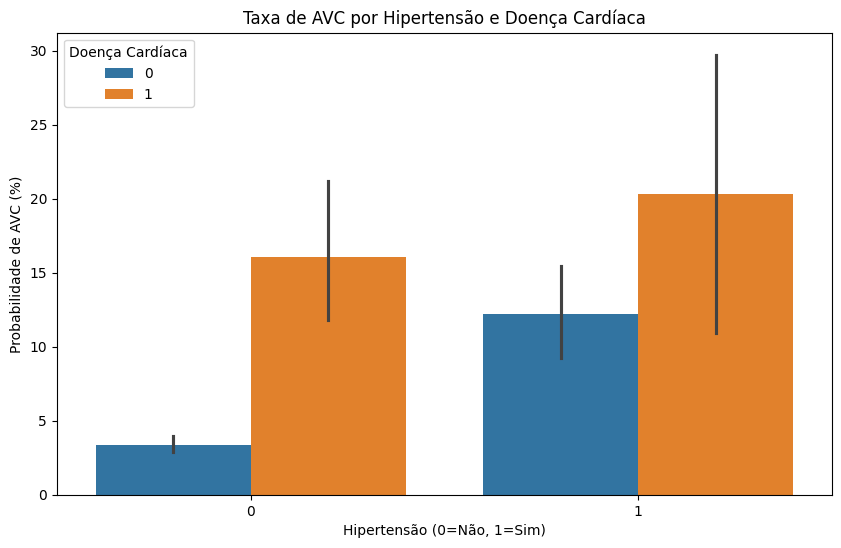

Optimization terminated successfully.
         Current function value: 0.184358
         Iterations 7


In [79]:
risco = df.groupby(['hypertension', 'heart_disease'])['stroke'].agg(['mean', 'count'])
risco.columns = ['taxa_avc', 'n_pacientes']
print(risco.reset_index())

tabela_contingencia = pd.crosstab(
    index=df['hypertension'] + df['heart_disease'],
    columns=df['stroke'],
    margins=True
)
chi2, pvalor, _, _ = chi2_contingency(tabela_contingencia)
print(f"\nTeste Chi-Quadrado: p-valor = {pvalor:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='hypertension',
    y='stroke',
    hue='heart_disease',
    estimator=lambda x: sum(x) / len(x) * 100
)
plt.title('Taxa de AVC por Hipertensão e Doença Cardíaca')
plt.ylabel('Probabilidade de AVC (%)')
plt.xlabel('Hipertensão (0=Não, 1=Sim)')
plt.legend(title='Doença Cardíaca')
plt.show()

from statsmodels.formula.api import logit
modelo = logit('stroke ~ hypertension + heart_disease', data=df).fit()


Existem relações entres níveis altos de glicose no sangue e AVC?

In [80]:
sem_avc = df[df['stroke'] == 0]['avg_glucose_level']
com_avc = df[df['stroke'] == 1]['avg_glucose_level']

t_stat, p_value = stats.ttest_ind(com_avc, sem_avc, equal_var=False)

print(f"""
Média de glicose:
- Sem AVC: {sem_avc.mean():.1f} mg/dL
- Com AVC: {com_avc.mean():.1f} mg/dL
Diferença: {com_avc.mean() - sem_avc.mean():.1f} mg/dL
p-valor: {p_value:.4f}
""")


Média de glicose:
- Sem AVC: 104.8 mg/dL
- Com AVC: 132.5 mg/dL
Diferença: 27.8 mg/dL
p-valor: 0.0000



O tabagismo aumenta a probabilidade de AVC?

In [81]:
#definindo as colunas
colunas_smoking = ['smoking_Unknown','smoking_formerly_smoked','smoking_never_smoked','smoking_smokes']

#calcular taxa de AVC para cada categoria
resultados = []
for coluna in colunas_smoking:
    taxa = df[df[coluna] == 1]['stroke'].mean() * 100
    resultados.append({'Categoria': coluna.replace('smoking_', ''), 'Taxa_AVC(%)': round(taxa, 2)})

#criar DataFrame e mostrar
df_taxa_avc = pd.DataFrame(resultados)
print(df_taxa_avc.to_markdown(index=False))

| Categoria       |   Taxa_AVC(%) |
|:----------------|--------------:|
| Unknown         |          3.05 |
| formerly_smoked |          7.91 |
| never_smoked    |          4.76 |
| smokes          |          5.32 |


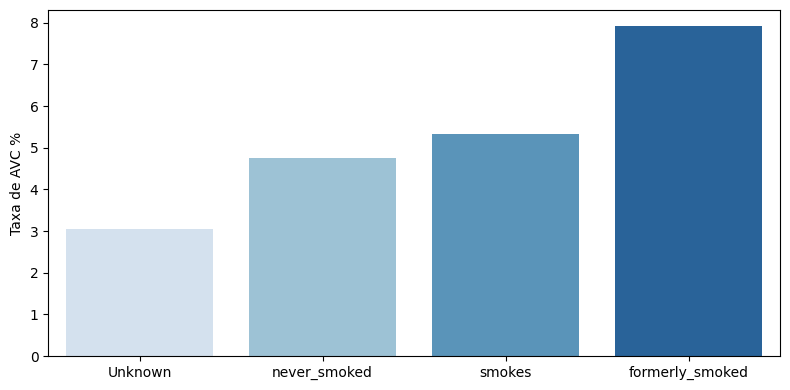

In [82]:
#plotar gráfico de barras do resultado
df_sorted = df_taxa_avc.sort_values('Taxa_AVC(%)')

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_sorted,
    x='Categoria',
    y='Taxa_AVC(%)',
    hue='Categoria',
    order=df_sorted['Categoria'],
    legend=False,
    palette='Blues'
)

plt.title('')
plt.xlabel('')
plt.ylabel('Taxa de AVC %')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Entre os fatores de risco presentes no dataset (hipertensão, doença cardíaca, alto nível de glicose , tabagismo e obesidade), qual está mais fortemente associado à ocorrência de AVC?

Está análise será realizada por meio de regressão logística, método estatístico que permite calcular Odds Ratios (OR) para quantificar a magnitude de associação entre potenciais fatores de risco e um desfecho binário.

Definição: Razão entre a chance de um evento (AVC) ocorrer na presença vs. ausência do fator.

OR = 1: Nenhum efeito.

OR > 1: Fator aumenta o risco.

OR < 1: Fator protege.

In [83]:
#ignorar as legendas apresentadas
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)


df = df.rename(columns={
    'smoking_formerly smoked': 'smoking_formerly_smoked',
    'smoking_never smoked': 'smoking_never_smoked'
})

try:
    modelo = logit('''stroke ~ hypertension + heart_disease + avg_glucose_level + bmi +
                     smoking_Unknown + smoking_formerly_smoked + smoking_never_smoked + smoking_smokes''',
                  data=df).fit(
                      maxiter=50,
                      method='bfgs'
                  )
except:

    modelo = logit('stroke ~ hypertension + heart_disease + avg_glucose_level + bmi',
                  data=df).fit()

#tradução dos atributos para melhor visualização
fatores = {
    'hypertension': 'Hipertensão',
    'heart_disease': 'Doença Cardíaca',
    'avg_glucose_level': 'Nível de Glicose',
    'bmi': 'IMC',
    'smoking_Unknown': 'Tabagismo Desconhecido',
    'smoking_formerly_smoked': 'Ex-Fumante',
    'smoking_never_smoked': 'Nunca Fumou',
    'smoking_smokes': 'Fumante Atual'
}

params_validos = [x for x in modelo.params.index[1:] if x in fatores]

resultados = pd.DataFrame({
    'Fator': [fatores[x] for x in params_validos],
    'OR': np.exp(modelo.params[1:][params_validos]),

}).sort_values('OR', ascending=False)

resultados.reset_index(drop=True, inplace=True)

print(resultados.to_markdown())

         Current function value: 0.179772
         Iterations: 50
         Function evaluations: 64
         Gradient evaluations: 64
|    | Fator                  |       OR |
|---:|:-----------------------|---------:|
|  0 | Doença Cardíaca        | 3.01092  |
|  1 | Hipertensão            | 2.49993  |
|  2 | Nível de Glicose       | 1.00712  |
|  3 | IMC                    | 0.997653 |
|  4 | Ex-Fumante             | 0.644022 |
|  5 | Fumante Atual          | 0.458874 |
|  6 | Nunca Fumou            | 0.424595 |
|  7 | Tabagismo Desconhecido | 0.332101 |


#Pré processamento

Nessa seção será realizado o pré-processamento de dados, etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Divisão do Dataset em treino e teste, com a proporção 70% treino e 30% teste.

In [85]:
#divisão em treino e teste
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
#apresentar as dimensões
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

#apresentar as distribuições
print("\nDistribuição em y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição em y_test:")
print(y_test.value_counts(normalize=True))

Dimensões de X_train: (3574, 10)
Dimensões de X_test: (1532, 10)
Dimensões de y_train: (3574,)
Dimensões de y_test: (1532,)

Distribuição em y_train:
stroke
0    0.951315
1    0.048685
Name: proportion, dtype: float64

Distribuição em y_test:
stroke
0    0.951044
1    0.048956
Name: proportion, dtype: float64


#Balanceamento dos dados

Durante a análise exploratória do dataset foi verificado a necessidade de balanceamento, visto a baixa representatividade de casos confirmados de AVC (apenas 4,9% dos registros), o que poderia prejudicar a capacidade do modelo de identificar padrões relevantes. Para corrigir esse desequilíbrio, foi aplicada a técnica de undersampling na classe majoritária (não AVC), reduzindo-a para igualar o número de casos da classe minoritária (AVC), resultando em uma amostra de treino com proporção balanceada de 50% para cada classe. Essa abordagem foi escolhida por preservar a integridade dos dados médicos reais, evitando a criação de padrões artificiais que poderiam comprometer a confiabilidade do modelo, especialmente em variáveis clinicamente críticas como doença cardíaca e hipertensão, que possuem forte correlação com ocorrências de AVC. Se optássemos por técnicas como o SMOTE, seriam adicionados ao dataset mais de 3.000 registros sintéticos, podendo criar padrões irreais no modelo.

OBS: O balanceamento foi aplicado somente nos dados de treino, mantendo a distribuição original nos dados de teste, visando obter uma avaliação realista (proporção de 95.1% vs 4.9% de AVC).



In [87]:
#aplicar undersampling APENAS no treino
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

#verificar o resultado
print("Distribuição original no treino:")
print(y_train.value_counts())

print("\nDistribuição após undersampling:")
print(y_train_under.value_counts())

print("\nDimensões finais:")
print(f"Treino balanceado: {X_train_under.shape}")
print(f"Teste original: {X_test.shape}")

Distribuição original no treino:
stroke
0    3400
1     174
Name: count, dtype: int64

Distribuição após undersampling:
stroke
0    174
1    174
Name: count, dtype: int64

Dimensões finais:
Treino balanceado: (348, 10)
Teste original: (1532, 10)


#Padronização dos dados

In [130]:
#colunas contínuas que serão padronizadas (excluindo binárias como 'hypertension' e 'heart_disease')
cols_continuas = ['age', 'avg_glucose_level', 'bmi']

scaler_std = StandardScaler()

# # Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train_under[cols_continuas])

#Aplicar a transformação no treino e teste (nas mesmas colunas)
X_train_under[cols_continuas] = scaler_std.transform(X_train_under[cols_continuas])
X_test[cols_continuas] = scaler_std.transform(X_test[cols_continuas])

#mostrar padronização
print("\nTreino padronizado :\n", X_train_under[cols_continuas].head())
print("\nTeste padronizado :\n", X_test[cols_continuas].head())


Treino padronizado :
            age  avg_glucose_level       bmi
1327 -0.436603          -0.973327 -0.575985
3246 -1.407305          -0.082385  0.887541
4995  0.164307           1.184489  0.118058
846   0.718994           1.254742 -0.394930
783  -2.470454          -0.400043 -1.798105

Teste padronizado :
            age  avg_glucose_level       bmi
3308  0.256755          -0.890204  0.329289
3595 -0.344155           0.149824 -0.440194
4452  1.227457          -0.009809  0.268937
1289  1.135009          -0.780266 -0.259139
3598 -0.205484          -0.062007 -0.319491


#Comparação da distribuição dos atributos e antes e depois da Padronização



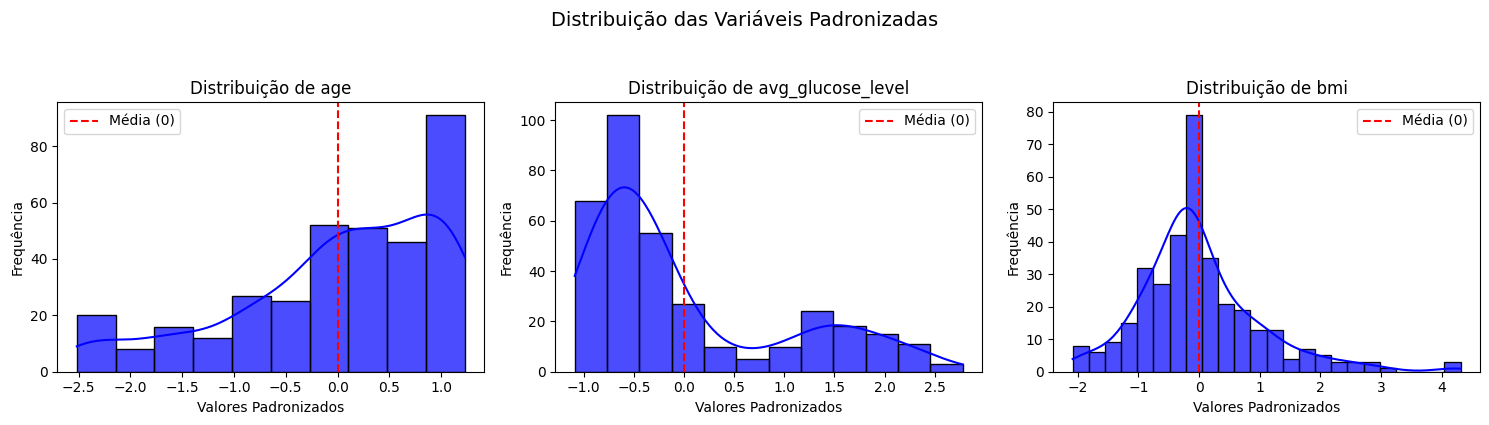

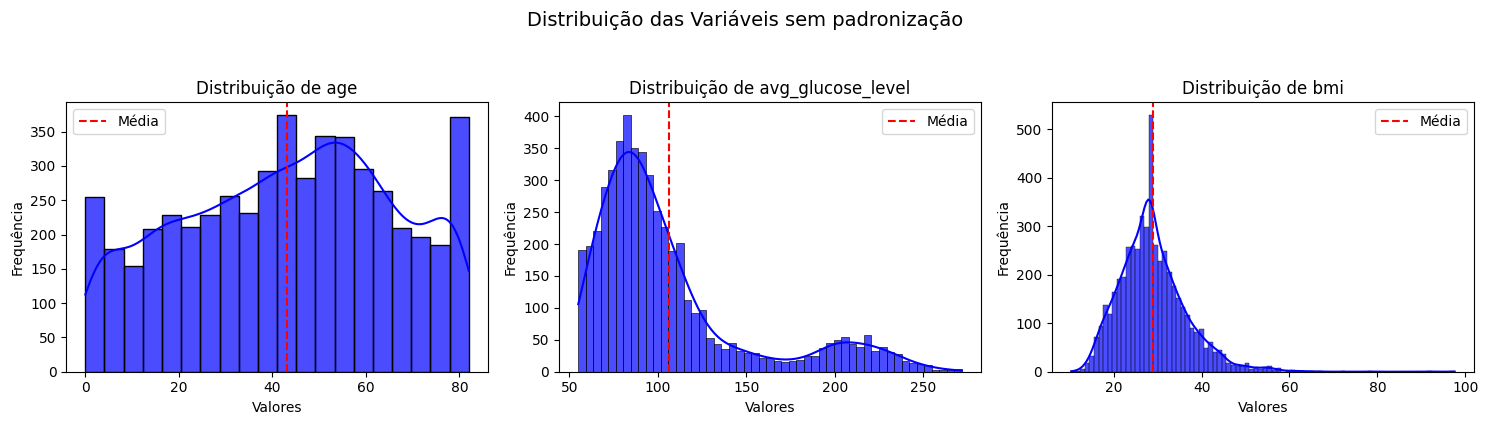

In [120]:
cols_padronizadas = ['age', 'avg_glucose_level', 'bmi']

# Configuração dos gráficos
plt.figure(figsize=(15, 4))
plt.suptitle('Distribuição das Variáveis Padronizadas', y=1.05, fontsize=14)

# Loop para criar um histograma por coluna
for i, col in enumerate(cols_padronizadas, 1):
    plt.subplot(1, len(cols_padronizadas), i)
    sns.histplot(data=X_train_under, x=col, kde=True, color='blue', alpha=0.7)
    plt.axvline(X_train_under[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Média (0)')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Valores Padronizados')
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

#Plotar gráfico com o dataset de backup salvo antes das etapas de transformação e pré-processamento.
cols_padronizadas = ['age', 'avg_glucose_level', 'bmi']

# Configuração dos gráficos
plt.figure(figsize=(15, 4))
plt.suptitle('Distribuição das Variáveis sem padronização', y=1.05, fontsize=14)

# Loop para criar um histograma por coluna
for i, col in enumerate(cols_padronizadas, 1):
    plt.subplot(1, len(cols_padronizadas), i)
    sns.histplot(data=df_backup, x=col, kde=True, color='blue', alpha=0.7)
    plt.axvline(df_backup[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Média')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

Verificamos que a padronização mantém a forma da distribuição original dos dados.

#Conclusão

A análise exporátoria e o pré-processamento do dataset de Acidente Vascular Cerebral - AVC, destacaram a importância de compreender os fatores de risco associados a essa condição clínica. O conjunto de dados revelou padrões claros, permitindo identificar grupos mais vulneráveis e relações significativas entre variáveis clínicas e a ocorrência de AVC.
Os testes estatísticos em conjunto com os gráficos de barras e bloxpot foram fundamentais para encontrar os resultados das hipóteses do problema, a qual foi possível observar:

*   Qual a idade média dos pacientes que sofreram AVC? A idade média foi de 67,7 anos, indicando que pacientes mais idosos têm maior risco.

*   Pessoas com hipertensão e doenças cardíacas têm mais chances de AVC? Sim. O teste estatístico mostrou que esses pacientes têm 6 vezes mais chances de sofrer um AVC em comparação com quem não tem essas condições.

*   Existe relação entre níveis altos de glicose no sangue e AVC? Sim. Pacientes com AVC apresentaram níveis médios de glicose significativamente mais altos (132,5 mg/dL) em comparação com aqueles sem AVC (104,8 mg/dL).

*   O tabagismo aumenta a probabilidade de AVC? Sim. Ex-fumantes têm a maior taxa de AVC (7,91%), seguidos por fumantes atuais (5,32%) e nunca fumantes (4,76%).

*   Qual fator de risco está mais fortemente associado ao AVC? Doença cardíaca (OR = 3,01) e hipertensão (OR = 2,5) são os fatores mais críticos.

A partir do resultado das hipóteses, podemos inferir que para diminuição do risco de AVC pacientes idosos, pacientes com hipertensão e doença cardíaca e pacientes com níveis de glicose no sangue próximos a 130 mg/dL devem ser incluídos em programas de acompanhamento médico.
